In [5]:
# this is Gopal Krishnan's Data Science Capstone project

NameError: name 'client_080a5c7831634648a7a7bc0d3b9d1387' is not defined

In [4]:
import pandas as pd
import numpy as np
print ("Hello Capstone Project Course")

Hello Capstone Project Course


Problem Statement: identify suitable locations for a South Indian restaurant in Hartford county, Ct.

Hartford county population and demographic data
Data source : https://en.wikipedia.org/wiki/Hartford_County,_Connecticut#Towns. 

Web scraping techniques was used to get Hartford county population density and demographics data from Wikipedia.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

ModuleNotFoundError: No module named 'folium'

In [27]:
df_ll = pd.read_csv('https://raw.githubusercontent.com/gkrishnan704/Coursera_Capstone/master/Hartford%20towns_lat_long.csv')
df_ll

,Town,Latitude,Longitude
0,Avon,41.80,-72.83
1,Berlin,41.62,-72.75
2,Bloomfield,41.83,-72.74
3,Bristol,41.68,-72.94
4,Burlington,41.77,-72.96
5,Canton,41.83,-72.90
6,East Granby,41.94,-72.73
7,East Hartford,41.77,-72.64
8,East Windsor,41.90,-72.58
9,Enfield,41.98,-72.60


In [23]:
git2='https://raw.githubusercontent.com/gkrishnan704/Coursera_Capstone/master/Hartford%20towns_income_r2.csv'
df_pop_inc=pd.read_csv(git2)
df_pop_inc

,Town,Per capita income,Population,Pop. Density
0,Avon,66862,22290,781
1,Berlin,38134,19866,736
2,Bloomfield,39738,20486,779
3,Bristol,29629,60477,2257
4,Burlington,43392,9301,306
5,Canton,46401,10292,412
6,East Granby,40698,5148,291
7,East Hartford,24373,51252,2741
8,East Windsor,31162,11162,416
9,Enfield,29340,44654,1306


In [28]:
df=pd.merge(df_ll,df_pop_inc,on='Town')
df.head()

,Town,Latitude,Longitude,Per capita income,Population,Pop. Density
0,Avon,41.80,-72.83,66862,22290,781
1,Berlin,41.62,-72.75,38134,19866,736
2,Bloomfield,41.83,-72.74,39738,20486,779
3,Bristol,41.68,-72.94,29629,60477,2257
4,Burlington,41.77,-72.96,43392,9301,306


Use geopy library to get the latitude and longitude values of Stuttgart.

In [29]:
address = 'Hartford'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hartford are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hartford are 41.764582, -72.6908547.


Define Foursquare Credentials and Version

In [30]:
CLIENT_ID = 'SLTUIPVY1OPNVTCLNAYXKUXG310AY5CBQBI054NHFOPTDVWP' # your Foursquare ID
CLIENT_SECRET = 'A1W255OEOFM0FZKBU50B0JDMMZGGXXYBLQSIO4A2VTC0E2G3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SLTUIPVY1OPNVTCLNAYXKUXG310AY5CBQBI054NHFOPTDVWP
CLIENT_SECRET:A1W255OEOFM0FZKBU50B0JDMMZGGXXYBLQSIO4A2VTC0E2G3


Now we create a function to explore all towns near Hartford

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe for Hartford venues

In [37]:
LIMIT = 100
radius = 1000
hartford_venues = getNearbyVenues(names=df['Town'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                                   radius = radius
                                  )

Avon
Berlin
Bloomfield
Bristol
Burlington
Canton
East Granby
East Hartford
East Windsor
Enfield
Farmington
Glastonbury
Granby
Hartford
Manchester
Marlborough
New Britain
Newington
Plainville
Rocky Hill
Simsbury
South Windsor
Southington
Suffield
West Hartford
Wethersfield
Windsor
Windsor Locks


In [38]:
print(hartford_venues.shape)
hartford_venues.head(20)

(651, 7)


,Town,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Avon,41.80,-72.83,Elephant Trail,41.808008,-72.828137,Thai Restaurant
1,Avon,41.80,-72.83,Max a Mia,41.807845,-72.824397,Italian Restaurant
2,Avon,41.80,-72.83,Bruegger's Bagel Bakery,41.807357,-72.827398,Bagel Shop
3,Avon,41.80,-72.83,The UPS Store,41.807955,-72.827703,Shipping Store
4,Avon,41.80,-72.83,SUBWAY,41.808727,-72.828960,Sandwich Place
5,Avon,41.80,-72.83,Dunkin',41.807046,-72.824549,Donut Shop
6,Avon,41.80,-72.83,Pick and Mix,41.807818,-72.827272,Korean Restaurant
7,Avon,41.80,-72.83,Countryside,41.801062,-72.824035,Trail
8,Avon,41.80,-72.83,My Dog's Daycare/Doggy Do's,41.797072,-72.836619,Pet Store
9,Avon,41.80,-72.83,Avon Hair Company,41.799881,-72.819965,Health & Beauty Service


Now to check how many venues per town

In [39]:
hartford_venues.groupby('Town').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Town,,,,,,
Avon,19,19,19,19,19,19
Berlin,14,14,14,14,14,14
Bloomfield,37,37,37,37,37,37
Bristol,38,38,38,38,38,38
Burlington,16,16,16,16,16,16
Canton,23,23,23,23,23,23
East Granby,12,12,12,12,12,12
East Hartford,22,22,22,22,22,22
East Windsor,2,2,2,2,2,2


In [40]:
hartford_venues[(hartford_venues['Venue Category'].str.contains('India', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Asia', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Grocer', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Takeout', regex=False))].count()

Town               120
Latitude           120
Longitude          120
Venue              120
Venue Latitude     120
Venue Longitude    120
Venue Category     120
dtype: int64

In [45]:
hartford_restaurant = hartford_venues[(hartford_venues['Venue Category'].str.contains('India', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Asia', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Grocer', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Takeout', regex=False))].groupby(['Town']).count()
hartford_restaurant.drop(['Latitude', 'Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
hartford_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
hartford_restaurant.head(28)

,Number of restaurants
Town,
Avon,4
Bloomfield,13
Bristol,6
Burlington,2
Canton,5
East Granby,2
East Hartford,4
Enfield,1
Farmington,5


In [47]:
hartford_India = hartford_venues[(hartford_venues['Venue Category'].str.contains('India', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Asia', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Indian Restaurant', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Grocer', regex=False)) |
                 (hartford_venues['Venue Category'].str.contains('Takeout', regex=False))].groupby(['Town']).count()
hartford_India.drop(['Latitude', 'Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
hartford_India.rename(columns = {'Venue Category':'Number of Indian restaurants'}, inplace=True)
hartford_India.head(28)

,Number of Indian restaurants
Town,
Bloomfield,2
Bristol,1
Burlington,1
Canton,1
East Hartford,1
Farmington,1
Granby,3
Hartford,2
Marlborough,1


In [48]:
# join above dataframe to the main df
df = df.join(hartford_restaurant, on='Town')
df = df.join(hartford_India, on='Town')

In [50]:
df.head(28)

,Town,Latitude,Longitude,Per capita income,Population,Pop. Density,Number of restaurants,Number of Indian restaurants
0,Avon,41.80,-72.83,66862,22290,781,4.0,NaN
1,Berlin,41.62,-72.75,38134,19866,736,NaN,NaN
2,Bloomfield,41.83,-72.74,39738,20486,779,13.0,2.0
3,Bristol,41.68,-72.94,29629,60477,2257,6.0,1.0
4,Burlington,41.77,-72.96,43392,9301,306,2.0,1.0
5,Canton,41.83,-72.90,46401,10292,412,5.0,1.0
6,East Granby,41.94,-72.73,40698,5148,291,2.0,NaN
7,East Hartford,41.77,-72.64,24373,51252,2741,4.0,1.0
8,East Windsor,41.90,-72.58,31162,11162,416,NaN,NaN
9,Enfield,41.98,-72.60,29340,44654,1306,1.0,NaN


In [51]:
df = df.fillna(0)
#df[['Number of restaurants', 'Number of Indian restaurants']] = df[['Number of restaurants', 'Number of Indian restaurants']].astype('int64')
df.head(28)

,Town,Latitude,Longitude,Per capita income,Population,Pop. Density,Number of restaurants,Number of Indian restaurants
0,Avon,41.80,-72.83,66862,22290,781,4.0,0.0
1,Berlin,41.62,-72.75,38134,19866,736,0.0,0.0
2,Bloomfield,41.83,-72.74,39738,20486,779,13.0,2.0
3,Bristol,41.68,-72.94,29629,60477,2257,6.0,1.0
4,Burlington,41.77,-72.96,43392,9301,306,2.0,1.0
5,Canton,41.83,-72.90,46401,10292,412,5.0,1.0
6,East Granby,41.94,-72.73,40698,5148,291,2.0,0.0
7,East Hartford,41.77,-72.64,24373,51252,2741,4.0,1.0
8,East Windsor,41.90,-72.58,31162,11162,416,0.0,0.0
9,Enfield,41.98,-72.60,29340,44654,1306,1.0,0.0


3. Methodology and Analysis 
After cleaning and preparing the data, let us identify the steps, that have to be performed in order to find the best towns. First, we will apply some basic exploratory analysis to our data. For that let's find the location of each town on the map. Then we can visually inspect some values in our data with the help of bar charts. Secondly, we have the possibility to reduce the number features in data frame by replacing them with more reasonable data. Finally, we will perform cluster analysis to find the best cluster of towns with meaningful features.

3.1 Exploratory Data Analysis
Let's first derive some basic statistical values of our data.

In [52]:
df.describe()

,Latitude,Longitude,Per capita income,Population,Pop. Density,Number of restaurants,Number of Indian restaurants
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,41.782857,-72.720000,38866.750000,32003.285714,1516.071429,4.285714,0.750000
std,0.112969,0.128351,12035.028568,25989.281608,1543.399877,3.933306,0.927961
min,41.600000,-72.960000,16798.000000,5148.000000,272.000000,0.000000,0.000000
25%,41.687500,-72.815000,31121.500000,14925.750000,599.000000,1.750000,0.000000
50%,41.770000,-72.730000,37731.500000,24425.500000,916.500000,4.000000,0.500000
75%,41.857500,-72.640000,43427.500000,43465.250000,2052.750000,5.000000,1.000000
max,41.980000,-72.460000,71709.000000,124775.000000,6932.000000,18.000000,3.000000


It'd be useful to visualize the center locations of each town. For that, we need to create a map of Hartford with towns superimposed on top.

In [54]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of Hartford using latitude and longitude values
map_hartford = folium.Map(location=[latitude, longitude], zoom_start=10)


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


altair-4.1.0         | 614 KB    | ##################################### | 1

NameError: name 'Town' is not defined

In [56]:
# add markers to map
for lat, lng, town in zip(df['Latitude'], df['Longitude'], df['Town']):
    label = '{}'.format(town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hartford)  
    
map_hartford

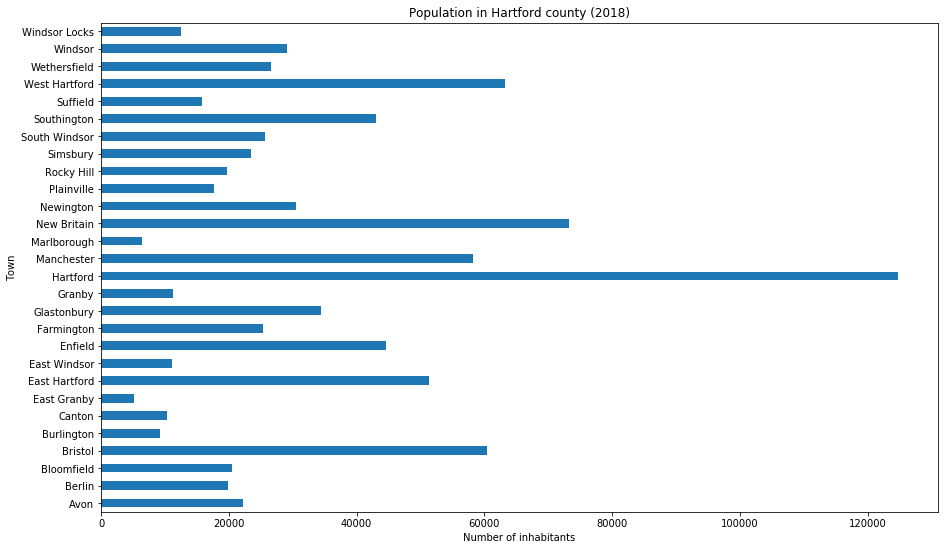

In [59]:
import matplotlib.pyplot as plt
# step 2: plot data
df[['Town', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('Town') # add y-label to the plot
plt.title('Population in Hartford county (2018)') # add title to the plot
plt.yticks (np.arange(28), df['Town'])
plt.show()

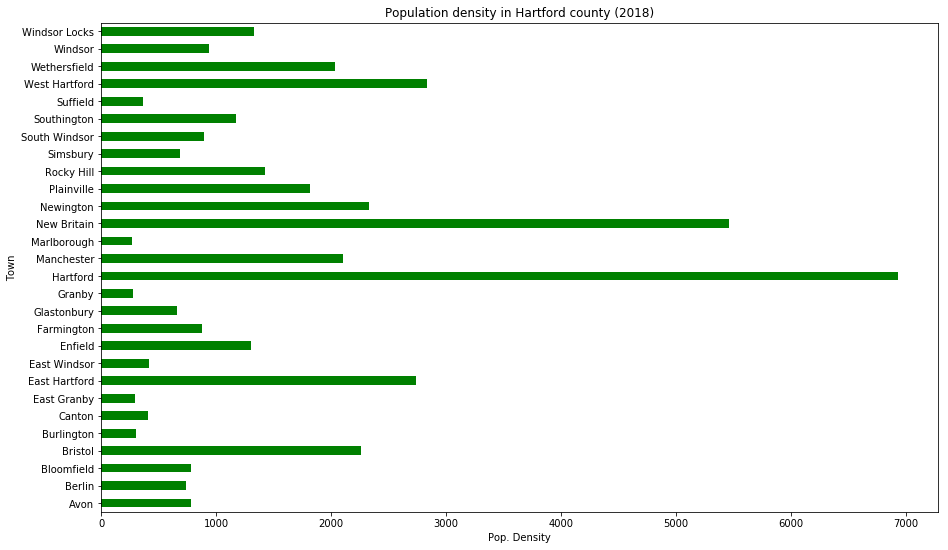

In [61]:
# step 2: plot data
# step 2: plot data
df[['Town', 'Pop. Density']].plot(kind='barh', figsize=(15, 9), legend = None, color='green')

plt.xlabel('Pop. Density') # add to x-label to the plot
plt.ylabel('Town') # add y-label to the plot
plt.title('Population density in Hartford county (2018)') # add title to the plot
plt.yticks (np.arange(28), df['Town'])
plt.show()

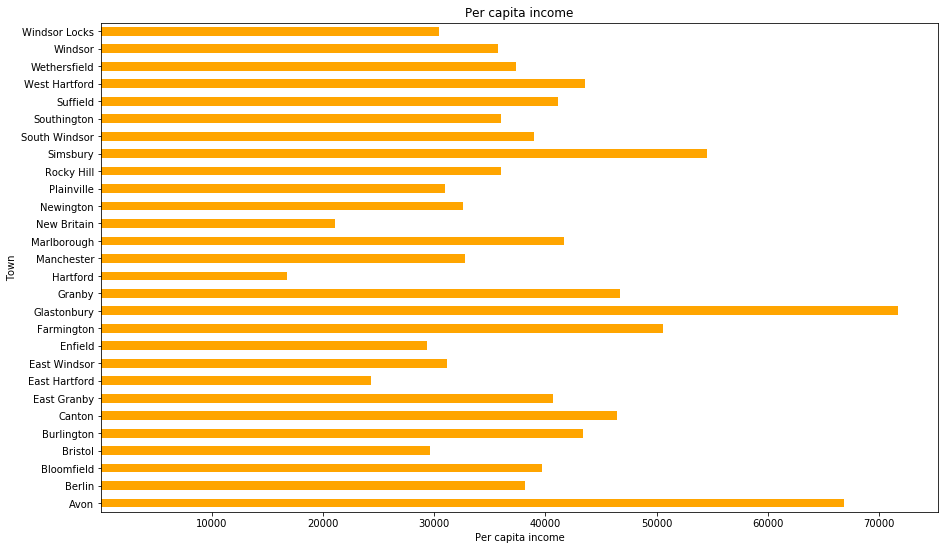

In [63]:
df[['Town', 'Per capita income']].plot(kind='barh', figsize=(15, 9), legend = None, color = 'orange')
plt.xlim(left=70)
plt.xlabel('Per capita income') # add to x-label to the plot
plt.ylabel('Town') # add y-label to the plot
plt.title('Per capita income') # add title to the plot
plt.yticks (np.arange(28), df['Town'])
plt.show()

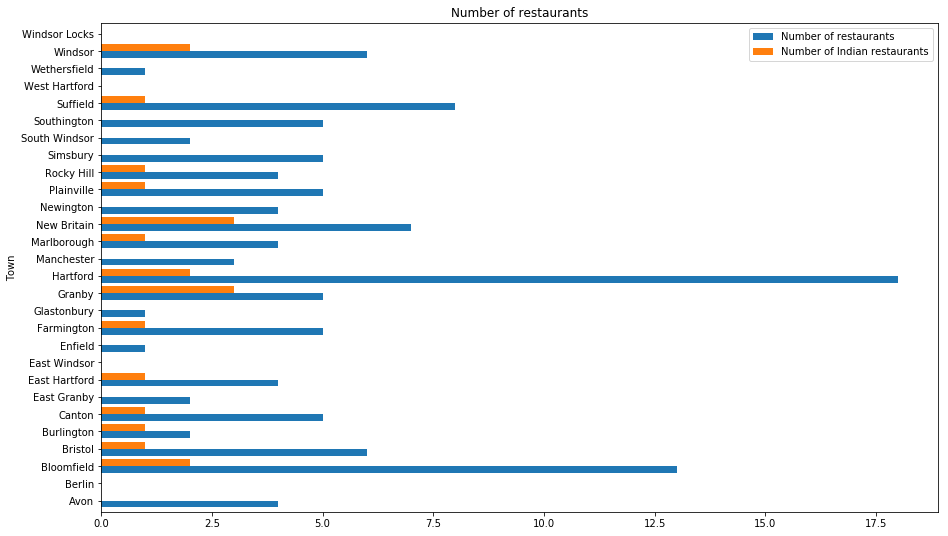

In [64]:
# step 2: plot data
# step 2: plot data
df[['Number of restaurants', 'Number of Indian restaurants']].plot(kind='barh', figsize=(15, 9), width = 0.8)

#plt.xlabel('Town') # add to x-label to the plot
plt.ylabel('Town') # add y-label to the plot
plt.title('Number of restaurants') # add title to the plot
plt.yticks (np.arange(28), df['Town'])
plt.show()

3.2 Cluster Analysis
In order to identify groups (clusters) with similar characteristics, let's us apply the unsupervised learning method to our data, namely K-Means algorithm. But before that, we can reduce the number of features and remove columns "Population", "Number of restaurants" and "Number of Indian restaurants". These three columns we can replace with two new ones, namely, "Number of restaurants per thousand people" and "Number of Indian restaurants per thousand people".

In [66]:
#df.drop([13], inplace =True)
#df.reset_index(inplace-True)
df_clusters = df.drop(['Town','Latitude', 'Longitude', 'Pop. Density'],axis = 1)
df_clusters['Number of restaurants per 1000 people'] = df_clusters['Number of restaurants']/(df_clusters['Population']/1000)
df_clusters['Number of India restaurants per 1000 people'] = df_clusters['Number of Indian restaurants']/(df_clusters['Population']/1000)
#df_clusters['Per capita income'] = df_clusters['Per capita income']*(-1)
#df_clusters = df_clusters.drop(['Cluster Labels', 'Population', 'Number of restaurants', 'Number of Indian restaurants'], axis = 1)
df_clusters = df_clusters.drop(['Population', 'Number of restaurants', 'Number of Indian restaurants'], axis = 1)
df_clusters.head()

,Per capita income,Number of restaurants per 1000 people,Number of India restaurants per 1000 people
0,66862,0.179453,0.000000
1,38134,0.000000,0.000000
2,39738,0.634580,0.097628
3,29629,0.099211,0.016535
4,43392,0.215031,0.107515


In [67]:
# performing normalization

from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 2.36883253, -0.08369812, -0.65082067],
       [-0.06200202, -1.04163668, -0.65082067],
       [ 0.07372127,  2.34582131,  0.97169638],
       [-0.78165698, -0.51203575, -0.37601467],
       [ 0.38290636,  0.10622111,  1.13602399],
       [ 0.63751445,  1.55169438,  0.96397161],
       [ 0.15495216,  1.03222216, -0.65082067],
       [-1.22639614, -0.62501976, -0.32655152],
       [-0.6519414 , -1.04163668, -0.65082067],
       [-0.80611087, -0.9220928 , -0.65082067],
       [ 0.98782269,  0.011661  ,  0.00503735],
       [ 2.77896394, -0.88658069, -0.65082067],
       [ 0.66171449,  1.32412854,  3.76846018],
       [-1.86735867, -0.27156233, -0.38443009],
       [-0.51740273, -0.76666994, -0.65082067],
       [ 0.23711383,  2.29259983,  1.94434519],
       [-1.5070658 , -0.53120327,  0.03024818],
       [-0.53356429, -0.34297656, -0.65082067],
       [-0.66564911,  0.46494287,  0.28728286],
       [-0.24079461,  0.04174911,  0.1924206 ],
       [ 1.32882322,  0.09360058, -0.650

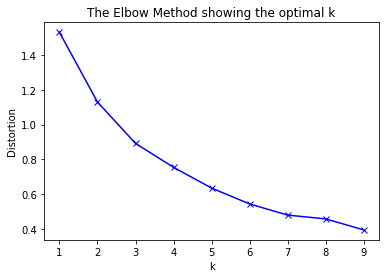

In [68]:
# using the elbow method to find optimal k

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From this, k = 3 would be the way to go.

In [84]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:24]

array([2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 0], dtype=int32)

In [85]:
#df = df.drop('Cluster Labels', axis = 1)
df.insert(0, 'Cluster Labels', kmeans.labels_)
df.head()

ValueError: cannot insert Cluster Labels, already exists

Now, it's time to create maps representing our clusters. The first map is illustrating the clusters where the radius of the Circle marker is proportional to a Number of restaurants per 1000 people in each town.

In [86]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df['Latitude'], df['Longitude'], df['Town'], df['Cluster Labels'], df_clusters[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The second map is illustrating the clusters where the radius of the Circle marker is proportional to a Net income per person in each borough.

In [91]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df['Latitude'], df['Longitude'], df['Town'], df['Cluster Labels'], df['Per capita income']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*0.05-25,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters2

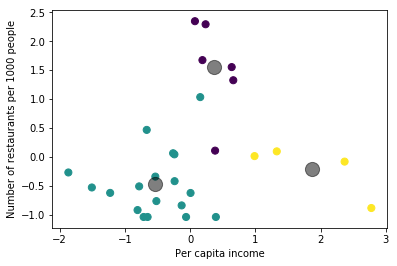

In [88]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters[:, 0], df_clusters[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Per capita income')
plt.ylabel('Number of restaurants per 1000 people')
plt.show()

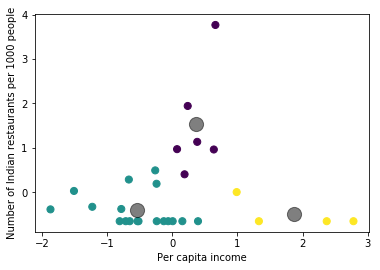

In [89]:
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters[:, 0], df_clusters[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel('Per capita income')
plt.ylabel('Number of Indian restaurants per 1000 people')
plt.show()

In [76]:
df[(df['Cluster Labels'] == 0)]

,Cluster Labels,Town,Latitude,Longitude,Per capita income,Population,Pop. Density,Number of restaurants,Number of Indian restaurants
2,0,Bloomfield,41.83,-72.74,39738,20486,779,13.0,2.0
4,0,Burlington,41.77,-72.96,43392,9301,306,2.0,1.0
5,0,Canton,41.83,-72.90,46401,10292,412,5.0,1.0
12,0,Granby,41.95,-72.79,46687,11282,277,5.0,3.0
15,0,Marlborough,41.63,-72.46,41669,6404,272,4.0,1.0
23,0,Suffield,41.98,-72.65,41098,15735,366,8.0,1.0


In [77]:
df[(df['Cluster Labels'] == 2)]

,Cluster Labels,Town,Latitude,Longitude,Per capita income,Population,Pop. Density,Number of restaurants,Number of Indian restaurants
0,2,Avon,41.80,-72.83,66862,22290,781,4.0,0.0
10,2,Farmington,41.73,-72.83,50541,25340,881,5.0,1.0
11,2,Glastonbury,41.70,-72.60,71709,34427,660,1.0,0.0
20,2,Simsbury,41.88,-72.81,54571,23511,685,5.0,0.0


In [78]:
df[(df['Cluster Labels'] == 1)]

,Cluster Labels,Town,Latitude,Longitude,Per capita income,Population,Pop. Density,Number of restaurants,Number of Indian restaurants
1,1,Berlin,41.62,-72.75,38134,19866,736,0.0,0.0
3,1,Bristol,41.68,-72.94,29629,60477,2257,6.0,1.0
6,1,East Granby,41.94,-72.73,40698,5148,291,2.0,0.0
7,1,East Hartford,41.77,-72.64,24373,51252,2741,4.0,1.0
8,1,East Windsor,41.90,-72.58,31162,11162,416,0.0,0.0
9,1,Enfield,41.98,-72.60,29340,44654,1306,1.0,0.0
13,1,Hartford,41.77,-72.68,16798,124775,6932,18.0,2.0
14,1,Manchester,41.78,-72.52,32752,58241,2103,3.0,0.0
16,1,New Britain,41.67,-72.78,21056,73206,5463,7.0,3.0
17,1,Newington,41.69,-72.73,32561,30562,2333,4.0,0.0


4. Results and discussion 
During the analysis, three clusters were defined. No clear outliers seen. Two other groups were clustered according to the amount income per person. It is obvious, that the cluster with highest average income per person has the highest priority for us (Cluster 2).
Avon, Glastonbury and Simsbury are all very attractive options in terms of distances to the center of their own cluster and relatively high value of income per person (~$60k). They are also very similar in terms of population density (~800), so any of these 3 towns would work for a Indian / South Indian restaurant. 

A second way to look for a location is to target very high density areas with not so significantly lower per capita income. Reviewing cluster 1, we see that one excellent location is West Hartford, with a per capita income of $43k (~25% lower than cluster 1 average) but a population density of 2837 (> 200% more than cluster 1 average). 

Reviewing this analysis, West Hartford would be my #1 choice for locating the Indian/South Indian restaurant.

What could be done better?
It'd be interesting to compare the results of venues from Foursquare to another map, such as Google map or Openstreet map.
I've also ignored demographic mixes in this analysis. 

5. Conclusion 
To conclude, the basic data analysis was performed to identify the most optimal towns for the placement of the Indian/South Indian restaurant in Hartford county. During the analysis, several important statistical features of the towns were explored and visualized. Furthermore, clustering helped to highlight the group of optimal areas. Finally, West Hartford won over high income (but low population density) towns of Avon, Glastonbury and Simsbury as the chosen location for greater analysis.